## Quiz #0701

### "TensorFlow machine learning with Calilfornia housing data"

In [31]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')    # Turn the warnings off.

Instructions for updating:
non-resource variables are not supported in the long term


#### Answer the following question by providing Python code:

In [2]:
# Bring the data.
housing_data = fetch_california_housing()

In [3]:
# Read the description.
print(housing_data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

1). Explore the data:
- Display the dataset as a DataFrame with column labels.

In [15]:
housing_data.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [14]:
housing_data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [40]:
df = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)

In [56]:
df['target']=housing_data.target

In [57]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


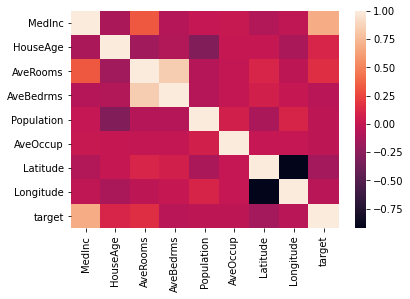

In [58]:
import seaborn as sns
sns.heatmap(df.corr())

**MedInc' is the most correlated feature with our target**

2). Build a machine learning model with TensorFlow. 
- Preprocess the data if necessary.
- Build a linear regression model.
- Train the model.
- Calculate the error metrics such as MSE and RMSE (in-sample and out-of-sample). Target: RMSE < 1.

In [27]:
#checking if there's missing values :
df.isnull().sum().sum()

0

i will build a linear regression model to predict the ‘target’ variable with ‘MedInc’ as predictor

In [210]:
W = tf.Variable([1.0], dtype=tf.float32)                # A constant initial value.
b = tf.Variable([1.0], dtype=tf.float32)                # A constant initial value.

In [211]:
#define placeholders
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

In [214]:
#let's define the model : 
y_model= W * x + b

In [215]:
#Define the loss function and the optimization method:
loss = tf.reduce_sum(tf.square(y - y_model))    
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.00001)    

In [216]:
#Training and testing the model :
train = optimizer.minimize(loss)                                         
init = tf.global_variables_initializer()  

In [226]:
x_train = scale(df['MedInc'])
y_train = df['target']

In [227]:
n_epochs = 1000
with tf.Session() as sess:
      
        sess.run(init)
        
        my_feed = {x:x_train, y:y_train}       
        
        for i in range(n_epochs):
          
            sess.run(train, feed_dict = my_feed)
        
        W_model, b_model = sess.run([W, b])  
        mse_value = sess.run(loss,feed_dict = my_feed )  

In [228]:
print('b0 = ',W_model)

b0 =  [0.7939894]


In [229]:
print("MSE  = {:5.3f}".format(mse_value))
print("RMSE = {:5.3f}".format(np.sqrt(mse_value)))

MSE  = 14471.348
RMSE = 120.297
